In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
from wikipedia_cleanup.data_processing import get_data
from wikipedia_cleanup.data_filter import generate_default_filters, KeepAttributesDataFilter, OnlyUpdatesDataFilter

In [3]:
# Set RAM Limit
import resource
  
def limit_memory(maxsize):
    soft, hard = resource.getrlimit(resource.RLIMIT_AS)
    resource.setrlimit(resource.RLIMIT_AS, (maxsize, hard))
limit_memory(84000000000)

# Enable Code Completion
%config Completer.use_jedi = False

Load data

In [4]:
data = get_data('../../custom-format-default-filtered/', n_jobs=0, filters=[OnlyUpdatesDataFilter(), KeepAttributesDataFilter(['infobox_key', 'page_title', 'property_name', 'template',\
                                                                                                     'previous_value', 'current_value', 'value_valid_from'])])

585it [40:41,  4.17s/it]


In [5]:
data = data[data['property_name']!='']

In [6]:
data = data.rename(columns={"value_valid_from": "timestamp"})
data['timestamp'] = pd.to_datetime(data['timestamp'])

Groupby property name and template type to get median and avg change frequencies

In [7]:
tqdm.pandas()

In [12]:
g = data.sort_values('timestamp').groupby(['infobox_key','property_name','template'])

In [ ]:
avg_time_diff = g.progress_apply(lambda x: x['timestamp'].diff().mean()).reset_index()

  0%|          | 0/6399380 [00:00<?, ?it/s]

In [ ]:
median_time_diff = g.progress_apply(lambda x: x['timestamp'].diff().median()).reset_index()

In [ ]:
avg_time_diff.rename(columns={0:'avgChangeFrequ'},inplace=True)
median_time_diff.rename(columns={0:'medianChangeFrequ'},inplace=True)

In [ ]:
ten_years = pd.Timedelta(weeks = 520)

In [ ]:
avg_time_diff['avgChangeFrequ'].fillna(ten_years, inplace=True)
median_time_diff['medianChangeFrequ'].fillna(ten_years,inplace=True)

In [28]:
avg_time_diff_static = avg_time_diff[avg_time_diff[['property_name','template']].progress_apply(lambda x: tuple(x), axis = 1).isin(avg_static_tuples)]
avg_time_diff_dynamic = avg_time_diff[avg_time_diff[['property_name','template']].progress_apply(lambda x: tuple(x), axis = 1).isin(avg_dynamic_tuples)]

  0%|          | 0/6399380 [00:00<?, ?it/s]

  0%|          | 0/6399380 [00:00<?, ?it/s]

In [33]:
avg_time_diff_static['property_temp'] = list(zip(avg_time_diff_static.property_name, avg_time_diff_static.template))
avg_time_diff_dynamic['property_temp'] = list(zip(avg_time_diff_dynamic.property_name, avg_time_diff_dynamic.template))

/san2/data/change-exploration/mp2021_wiki_cleanup/wikipedia_cleanup/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/san2/data/change-exploration/mp2021_wiki_cleanup/wikipedia_cleanup/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
avg_time_diff_static

,infobox_key,property_name,template,avgChangeFrequ,property_temp
0,100001203-0,image,infobox book,980 days 05:05:10,"(image, infobox book)"
1,100001898-0,more users,infobox aircraft,3640 days 00:00:00,"(more users, infobox aircraft)"
2,100001898-0,more users,infobox aircraft type,376 days 04:14:17.200000,"(more users, infobox aircraft type)"
3,100001898-0,number built,infobox aircraft,3640 days 00:00:00,"(number built, infobox aircraft)"
4,100001898-0,number built,infobox aircraft type,331 days 20:05:57.777777776,"(number built, infobox aircraft type)"
...,...,...,...,...,...
6399375,99999680-0,spouse,user:kudret abi/template:infobox actor new,3640 days 00:00:00,"(spouse, user:kudret abi/template:infobox acto..."
6399376,99999680-0,template,infobox actor,3640 days 00:00:00,"(template, infobox actor)"
6399377,99999680-0,template,infobox person,3640 days 00:00:00,"(template, infobox person)"
6399378,99999680-0,template,user:kudret abi/template:infobox actor new,3640 days 00:00:00,"(template, user:kudret abi/template:infobox ac..."


In [44]:
avg_time_diff_static['avgChangeFrequ'][:10]

0              980 days 05:05:10
1             3640 days 00:00:00
2       376 days 04:14:17.200000
3             3640 days 00:00:00
4    331 days 20:05:57.777777776
5              766 days 15:16:06
6       458 days 21:07:42.500000
8              483 days 03:33:32
10      375 days 23:46:56.250000
11             322 days 02:21:35
Name: avgChangeFrequ, dtype: timedelta64[ns]

In [38]:
avg_time_diff_static['property_temp'][:10].shape

(10,)

In [56]:
avg_time_diff_static = avg_time_diff_static[avg_time_diff_static['property_temp'].isin(static_data[:20].index)]
avg_time_diff_dynamic = avg_time_diff_dynamic[avg_time_diff_dynamic['property_temp'].isin(dynamic_data[:20].index)]

In [57]:
avg_time_diff_static['avgChangeFrequ'] = avg_time_diff_static['avgChangeFrequ']/86400000000000
avg_time_diff_dynamic['avgChangeFrequ'] = avg_time_diff_dynamic['avgChangeFrequ']/86400000000000

/san2/data/change-exploration/mp2021_wiki_cleanup/wikipedia_cleanup/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/san2/data/change-exploration/mp2021_wiki_cleanup/wikipedia_cleanup/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
import seaborn as sns

In [81]:
pd.to_numeric(avg_time_diff_static['avgChangeFrequ'])

8           483
10          375
12          694
32         3640
35          284
           ... 
6399205     453
6399217     631
6399264     748
6399266     591
6399364     377
Name: avgChangeFrequ, Length: 430614, dtype: int64

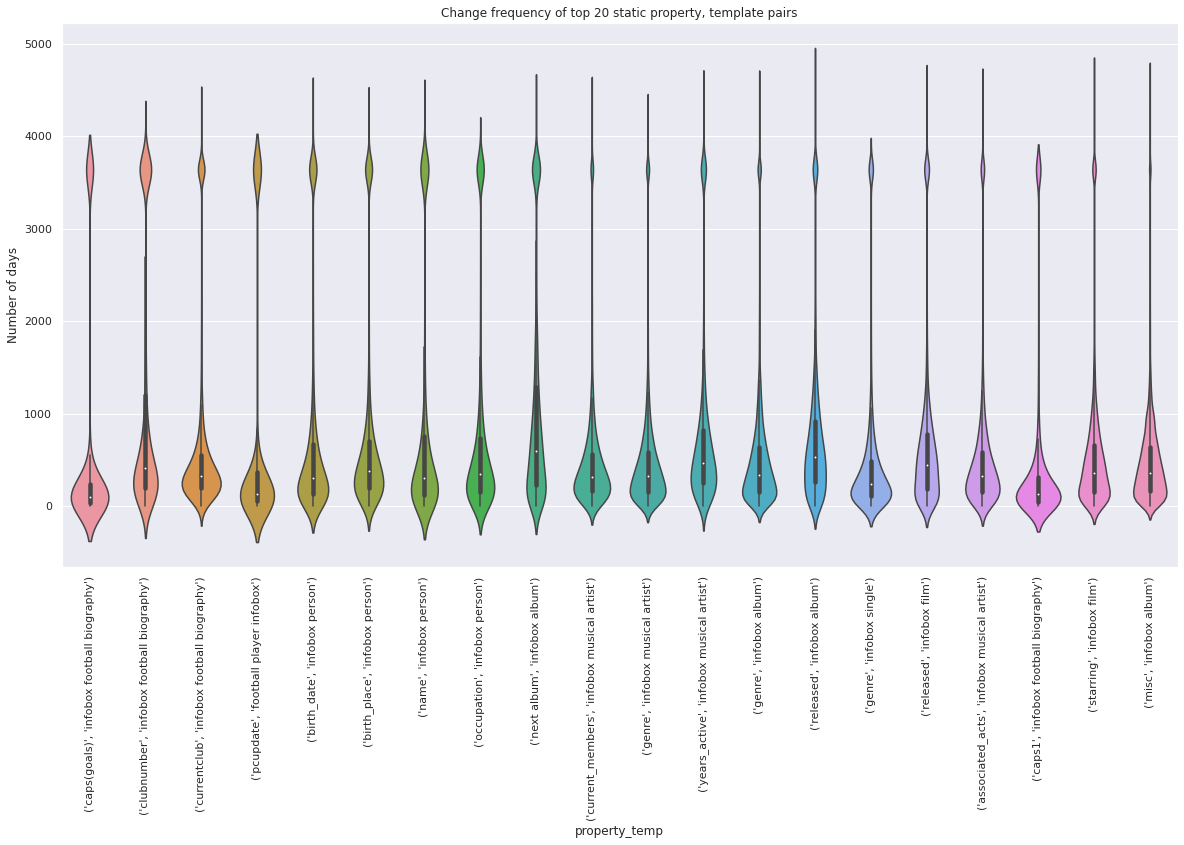

In [90]:
sns.set(rc={"figure.figsize":(20, 10)})
violin = sns.violinplot(y=pd.to_numeric(avg_time_diff_static['avgChangeFrequ']), x=avg_time_diff_static['property_temp'])
violin.set_title('Change frequency of top 20 static property, template pairs')
violin.set_ylabel('Number of days')
violin.tick_params(axis="x", rotation=90)
plt.show()

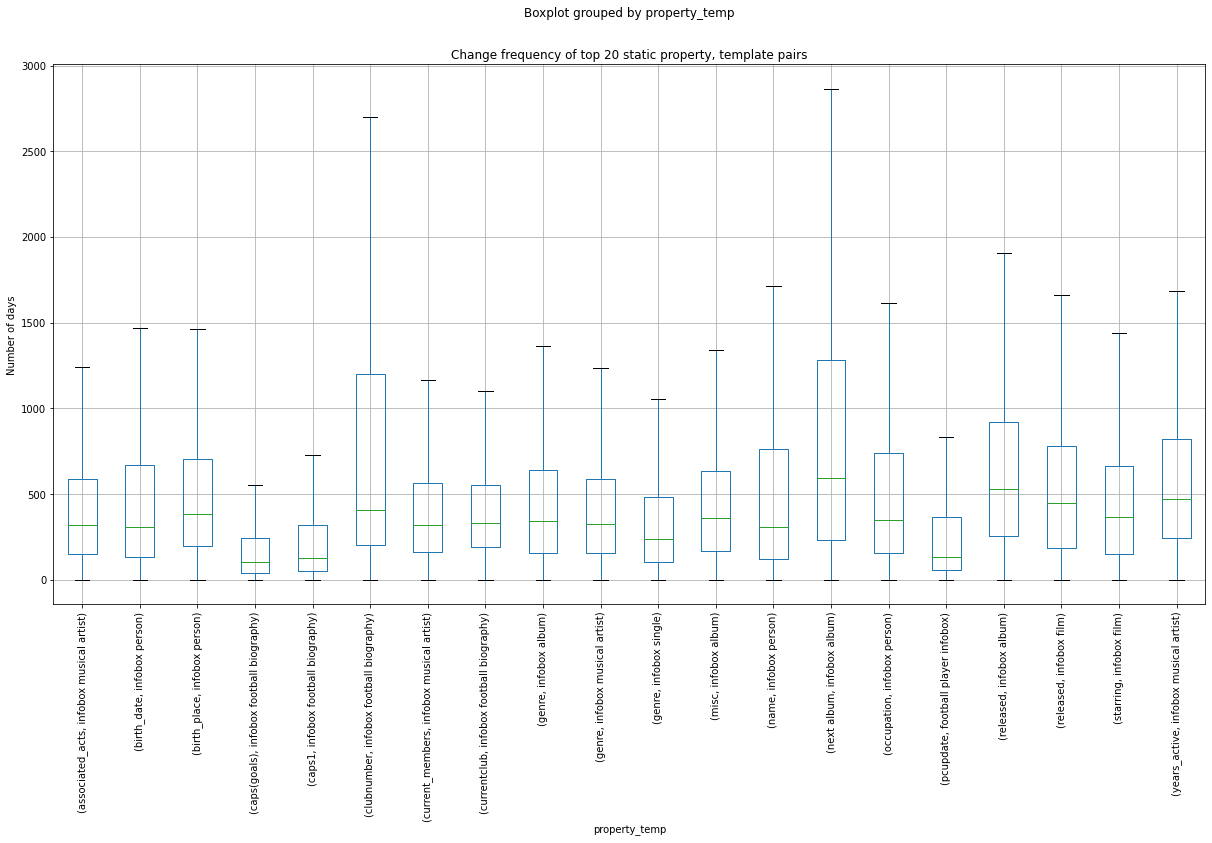

In [73]:
bplot = avg_time_diff_static.boxplot('avgChangeFrequ', by='property_temp', figsize=(20,10), showfliers=False)
bplot.set_ylabel('Number of days')
bplot.set_title('Change frequency of top 20 static property, template pairs')
bplot.tick_params(axis="x", rotation=90)
plt.show()

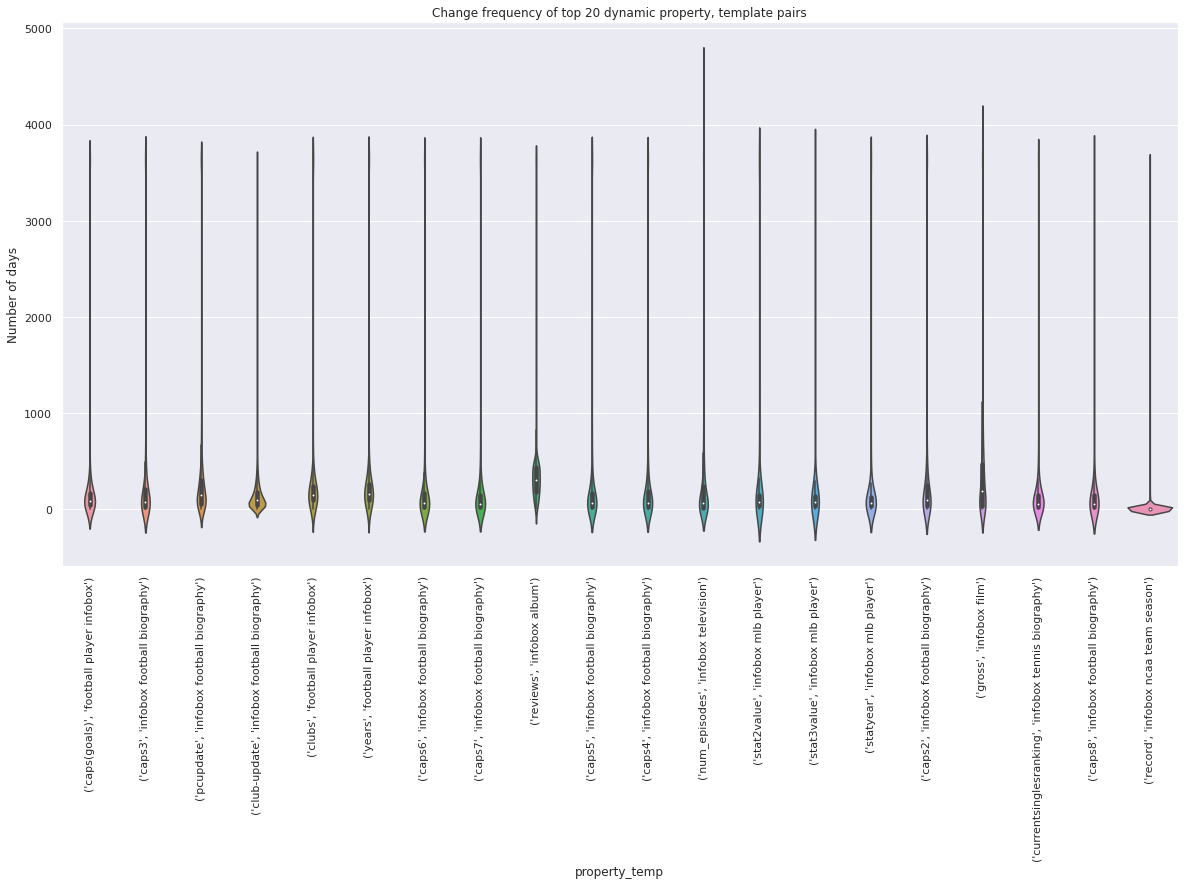

In [91]:
sns.set(rc={"figure.figsize":(20, 10)})
violin = sns.violinplot(y=pd.to_numeric(avg_time_diff_dynamic['avgChangeFrequ']), x=avg_time_diff_dynamic['property_temp'])
violin.set_title('Change frequency of top 20 dynamic property, template pairs')
violin.set_ylabel('Number of days')
violin.tick_params(axis="x", rotation=90)
plt.show()

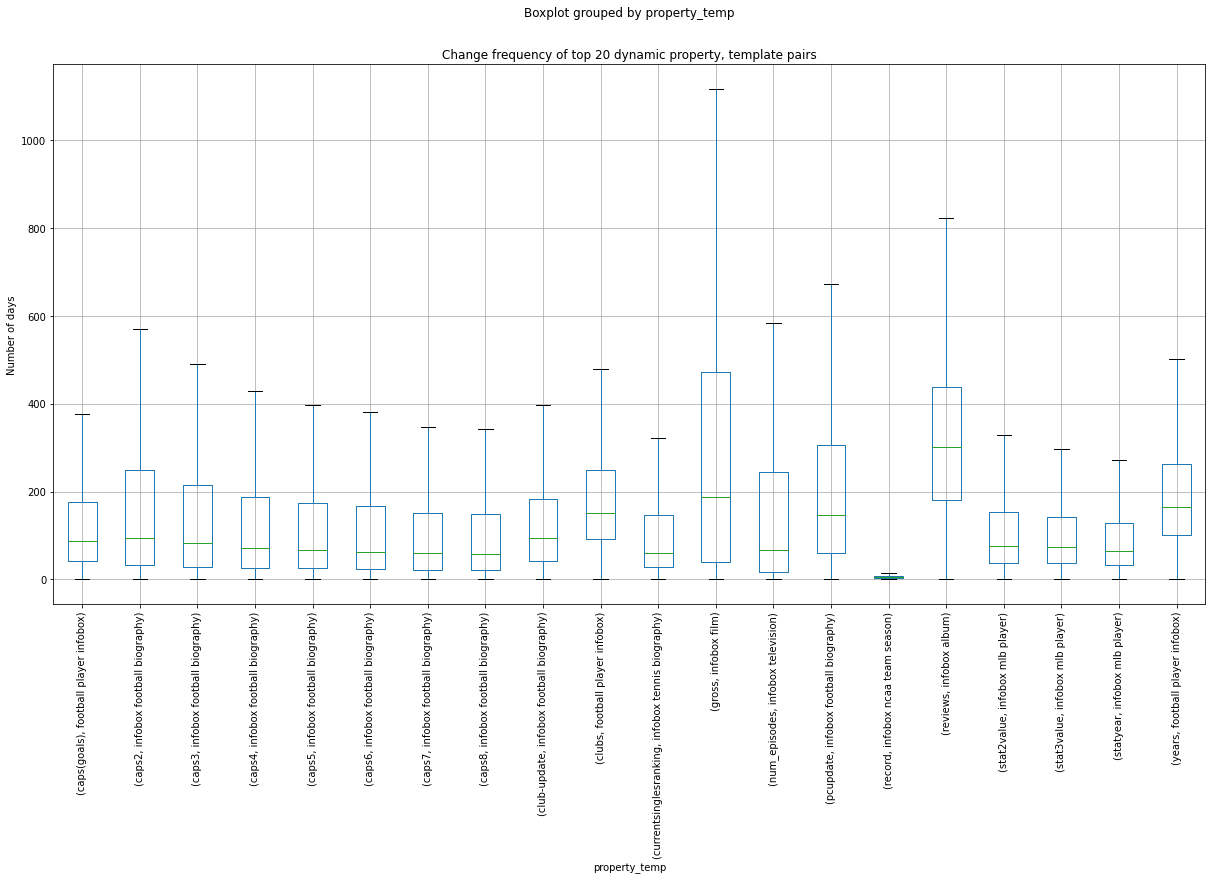

In [70]:
bplot = avg_time_diff_dynamic.boxplot('avgChangeFrequ', by='property_temp', figsize=(20,10), showfliers=False)
bplot.set_ylabel('Number of days')
bplot.set_title('Change frequency of top 20 dynamic property, template pairs')
bplot.tick_params(axis="x", rotation=90)
plt.show()

ValueError: Dimensions of labels and X must be compatible

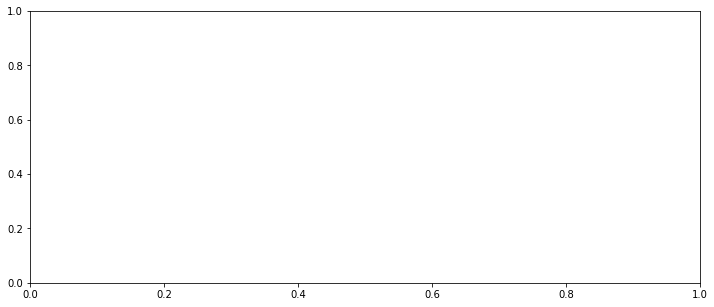

In [55]:
plt.figure(figsize=(12,5))
plt.boxplot(avg_time_diff_static[avg_time_diff_static['property_temp'].isin(static_data[:10].index)]['avgChangeFrequ'],\
           labels=static_data[:10].index)
plt.title('Count of static property, template pairs')
plt.ylabel('Number of days')
plt.xlabel('Property template pair')
plt.show()

In [ ]:
g_avg = avg_time_diff.groupby(['property_name','template'])['avgChangeFrequ'].mean(numeric_only=False)
g_med = median_time_diff.groupby(['property_name','template'])['medianChangeFrequ'].median(numeric_only=False)

In [61]:
# label everything with more than 13 months change frequ as static
avg_static = g_avg > pd.Timedelta(weeks = 56)
median_static = g_med > pd.Timedelta(weeks = 56)

In [71]:
avg_static_infoboxes = g_avg[avg_static].index.to_frame(index=False)
avg_dynamic_infoboxes = g_avg[~avg_static].index.to_frame(index=False)
median_static_infoboxes = g_med[median_static].index.to_frame(index=False)
median_dynamic_infoboxes = g_med[~median_static].index.to_frame(index=False)

Saving

In [81]:
avg_static_infoboxes.to_csv('../data/avg_static.csv',index=False)
avg_dynamic_infoboxes.to_csv('../data/avg_dynamic.csv',index=False)
median_static_infoboxes.to_csv('../data/median_static.csv',index=False)
median_dynamic_infoboxes.to_csv('../data/median_dynamic.csv',index=False)

Plotting

In [8]:
avg_static_infoboxes = pd.read_csv('../data/avg_static.csv')
avg_dynamic_infoboxes = pd.read_csv('../data/avg_dynamic.csv')
median_static_infoboxes = pd.read_csv('../data/median_static.csv')
median_dynamic_infoboxes = pd.read_csv('../data/median_dynamic.csv')

In [9]:
avg_static_tuples = [tuple(v) for v in avg_static_infoboxes.values]
avg_dynamic_tuples = [tuple(v) for v in avg_dynamic_infoboxes.values]
median_static_tuples = [tuple(v) for v in median_static_infoboxes.values]
median_dynamic_tuples = [tuple(v) for v in median_dynamic_infoboxes.values]

In [48]:
g = data.groupby(['property_name','template'])['infobox_key'].count()

In [23]:
g.index.isin(avg_static_tuples)

array([ True, False, False, ..., False, False, False])

In [49]:
static_data = g[g.index.isin(avg_static_tuples)]
dynamic_data = g[g.index.isin(avg_dynamic_tuples)]

In [50]:
static_data = static_data.sort_values(ascending=False)
dynamic_data = dynamic_data.sort_values(ascending=False)

In [51]:
static_data[:10].index

MultiIndex([(          'genre',              'infobox album'),
            (          'genre',     'infobox musical artist'),
            (    'currentclub', 'infobox football biography'),
            (          'genre',             'infobox single'),
            (       'starring',               'infobox film'),
            (     'birth_date',             'infobox person'),
            ('associated_acts',     'infobox musical artist'),
            (           'misc',              'infobox album'),
            (    'birth_place',             'infobox person'),
            (       'released',               'infobox film')],
           names=['property_name', 'template'])

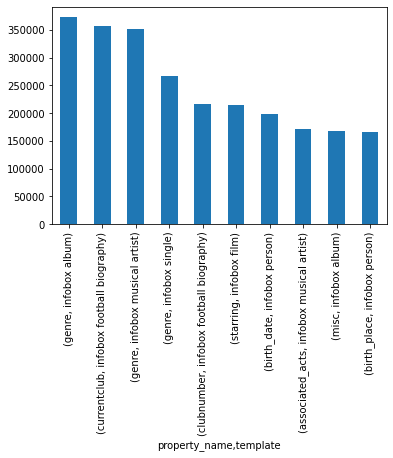

In [34]:
static_data[:10].plot.bar()
plt.show()

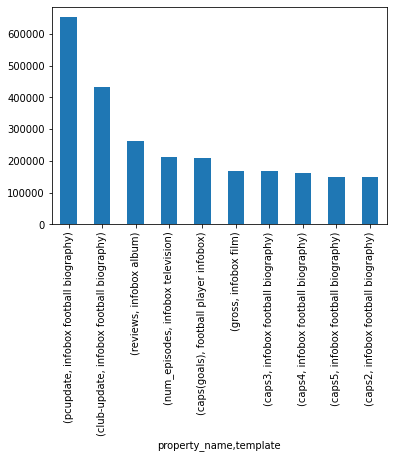

In [35]:
dynamic_data[:10].plot.bar()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(avg_static_infoboxes[:10].values,\
           labels=avg_static_infoboxes[:10].index)
plt.title('Count of static property, template pairs')
plt.ylabel('Count of static infobox occurences')
plt.xlabel('Property template pair')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(avg_dynamic_infoboxes[:10].values,\
        labels=avg_dynamic_infoboxes[:10].index)
plt.title('Count of dynamic property, template pairs')
plt.ylabel('Count of dynamic infobox occurences')
plt.xlabel('Property template pair')
plt.show()